In [61]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [15]:
df=pd.read_csv('forestfires.csv')

In [16]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [17]:
df.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [19]:
#checking for duplicated values
df[df.duplicated()].shape


(8, 31)

In [20]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [21]:
df=df.drop_duplicates()


In [22]:
df['size_category']=df['size_category'].apply(lambda x: 1 if x=='large' else 0)


In [26]:
df.drop(["month","day"],axis=1,inplace =True)


In [27]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


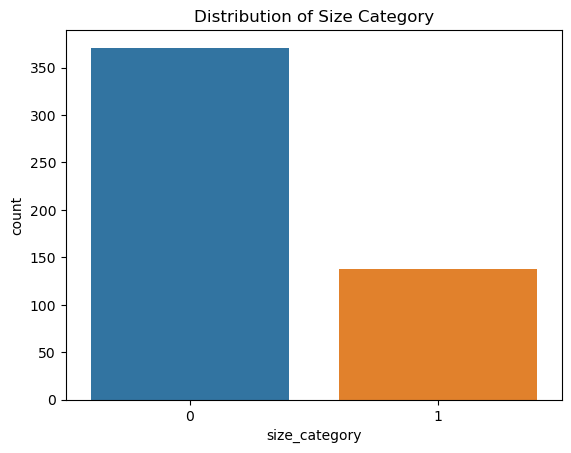

In [75]:
# Visualize the distribution of the target variable
sns.countplot(x='size_category', data=df)
plt.title('Distribution of Size Category')
plt.show()

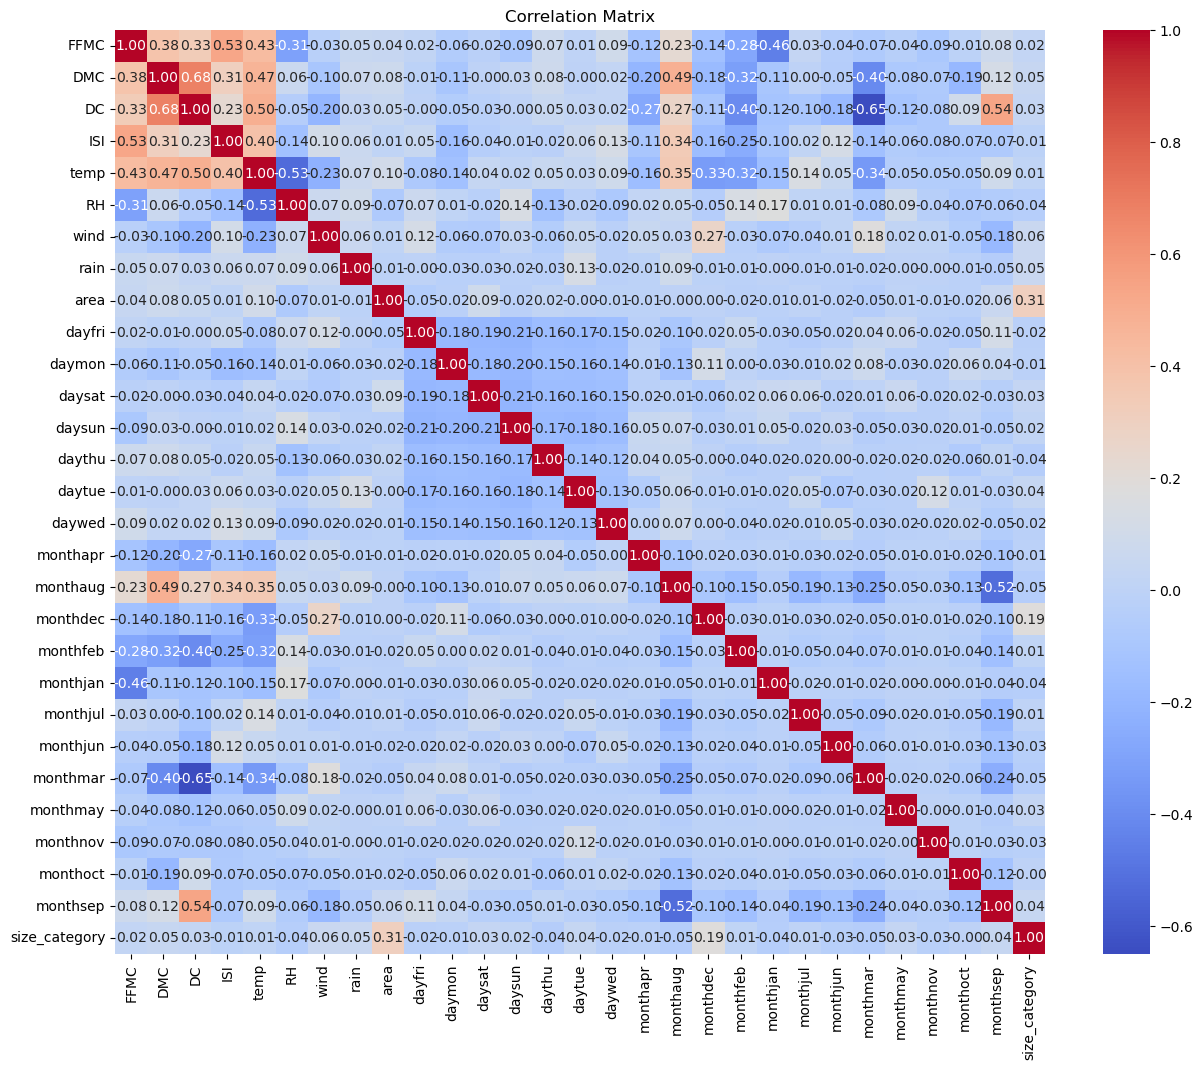

In [76]:
# Visualize the correlation matrix
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


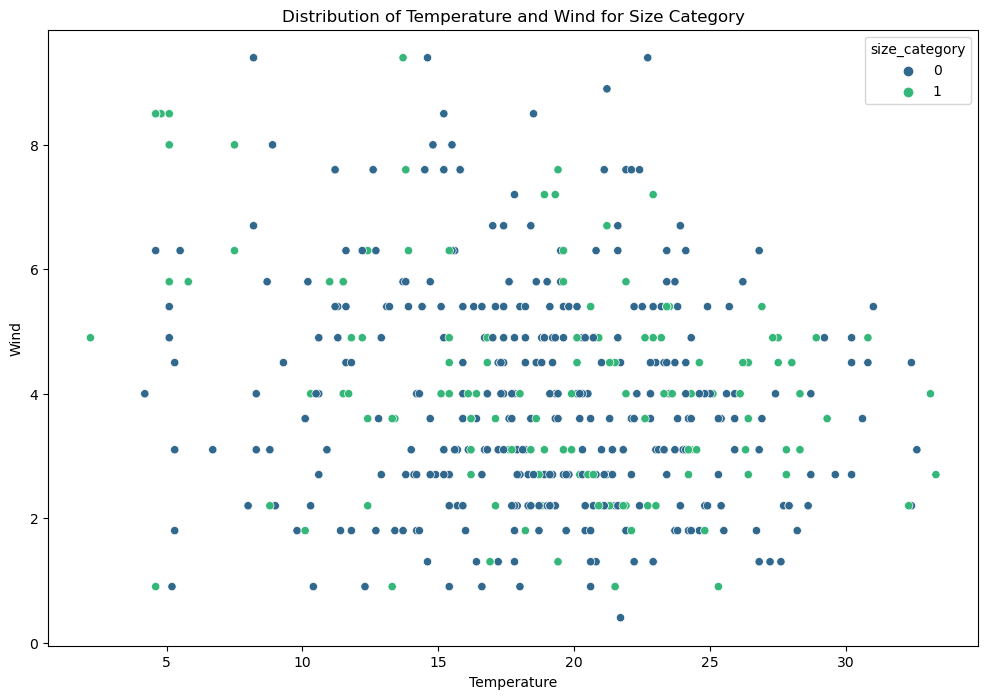

In [77]:
# Visualize the distribution of 'temp' and 'wind' for small and large fires
plt.figure(figsize=(12, 8))
sns.scatterplot(x='temp', y='wind', hue='size_category', data=df, palette='viridis')
plt.title('Distribution of Temperature and Wind for Size Category')
plt.xlabel('Temperature')
plt.ylabel('Wind')
plt.show()


Text(0.5, 1.0, 'Box Plot for FFMC by Size Category')

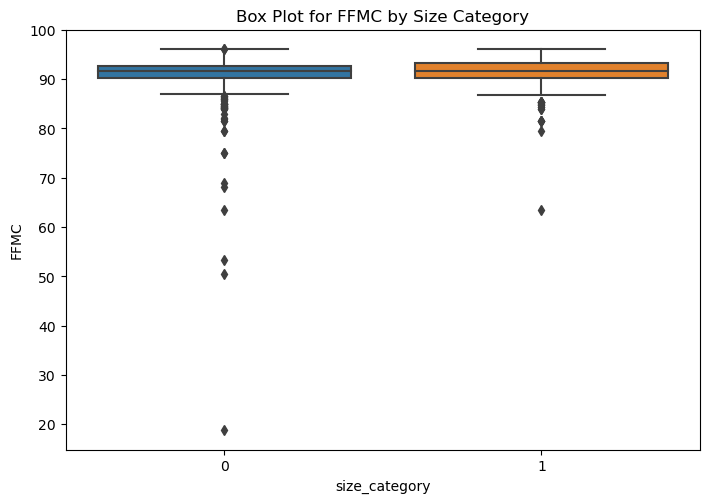

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for individual categories
plt.figure(figsize=(18, 12))

# Box plot for FFMC
plt.subplot(2, 2, 1)
sns.boxplot(x='size_category', y='FFMC', data=df)
plt.title('Box Plot for FFMC by Size Category')


Text(0.5, 1.0, 'Box Plot for DMC by Size Category')

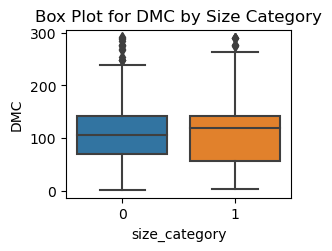

In [80]:
# Box plot for DMC
plt.subplot(2, 2, 2)
sns.boxplot(x='size_category', y='DMC', data=df)
plt.title('Box Plot for DMC by Size Category')

Text(0.5, 1.0, 'Box Plot for DC by Size Category')

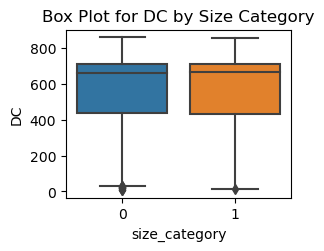

In [81]:
# Box plot for DC
plt.subplot(2, 2, 3)
sns.boxplot(x='size_category', y='DC', data=df)
plt.title('Box Plot for DC by Size Category')


Text(0.5, 1.0, 'Box Plot for ISI by Size Category')

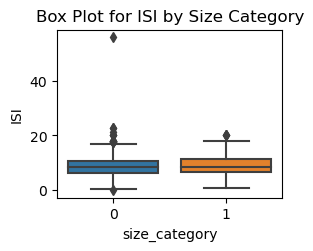

In [82]:
# Box plot for ISI
plt.subplot(2, 2, 4)
sns.boxplot(x='size_category', y='ISI', data=df)
plt.title('Box Plot for ISI by Size Category')

In [28]:
##Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
fire_data = norm_func(df)


In [32]:
fire_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
x = fire_data.drop(['size_category'], axis=1)
y = fire_data['size_category']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)


In [45]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((381, 28), (381,), (128, 28), (128,))

In [48]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [52]:
pred=model.predict(x_test)


In [53]:
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[91 35]
 [ 1  1]]
              precision    recall  f1-score   support

         0.0       0.99      0.72      0.83       126
         1.0       0.03      0.50      0.05         2

    accuracy                           0.72       128
   macro avg       0.51      0.61      0.44       128
weighted avg       0.97      0.72      0.82       128



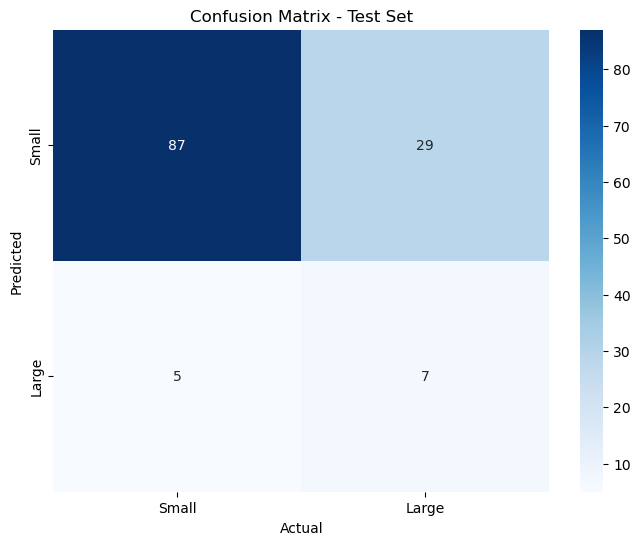

In [84]:
cm = confusion_matrix(pred_test, y_test)

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Small', 'Large'], yticklabels=['Small', 'Large'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [55]:
np.mean(pred==y_test)*100


71.875

In [62]:
model = SVC(kernel='rbf')

In [63]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}


In [65]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [66]:
grid.fit(x_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.727 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [67]:
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [68]:
final_model = grid.best_estimator_


In [85]:
results = pd.DataFrame(grid.cv_results_)
scores = np.array(results.mean_test_score).reshape(len(param_grid['C']), len(param_grid['gamma']))

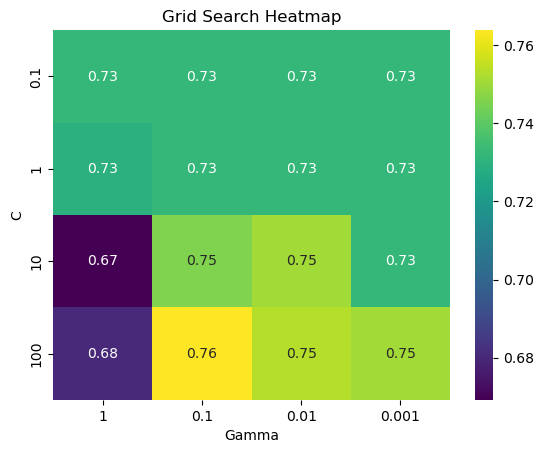

In [86]:
sns.heatmap(scores, annot=True, cmap="viridis", xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Heatmap')
plt.show()

In [70]:
cv_scores = cross_val_score(final_model, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-validation scores: [0.76623377 0.76315789 0.77631579 0.71052632 0.80263158]
Mean CV Score: 0.7637730690362269


In [71]:
pred_test = final_model.predict(x_test)


In [87]:
print("Accuracy:", metrics.accuracy_score(y_test, pred_test))
print(confusion_matrix(pred_test, y_test))
print(classification_report(pred_test, y_test))

Accuracy: 0.734375
[[87 29]
 [ 5  7]]
              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84       116
         1.0       0.19      0.58      0.29        12

    accuracy                           0.73       128
   macro avg       0.57      0.67      0.56       128
weighted avg       0.88      0.73      0.79       128

